In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import animation

In [3]:
class particle():
    def __init__(self, position, direction):
        self.p = np.array(position)
        self.d = direction
        self.m = 1
        self.dt = 0.25 #s
        self.initrho = 1
        self.rho = 0
        self.pre = 0
        self.vmax = 10
        self.a = np.array([0, 0, 0])
        self.g = np.array([0, 0, 9.81])
    
    def get_magnitude(self):
        return np.linalg.norm(self.p)
    
    def get_pos(self):
        return self.p
    
    def set_pos(self, new_pos):
        self.p = new_pos

    def get_dir(self):
        return self.d
    
    def get_initrho(self):
        return self.initrho
    
    def get_rho(self):
        return self.rho
    
    def get_initpre(self):
        return self.initpre
    
    def get_pre(self):
        return self.pre
    
    def get_acc(self):
        return self.a
    
    def get_m(self):
        return self.m

In [4]:
class particle_array():
    def __init__(self, n, dims, seed = 4):
        # dims is an array with 6 elements
        # seed is a random seed
        self.seed = random.seed(seed)
        self.xmin = dims[0]
        self.xmax = dims[1]
        self.ymin = dims[2]
        self.ymax = dims[3]
        self.zmin = dims[4]
        self.zmax = dims[5]
        
        pPositions = []
        
        for i in range(n):
            pPositions.append([
                random.uniform(self.xmax - 1.8, self.xmax - 1.5),
                random.uniform(self.ymax - 1.8, self.ymax - 1.5),
                random.uniform(self.zmax - 1.8, self.zmax - 1.5)
            ])
            
        self.particles = [particle(pPositions[i], [0, 0, 0]) for i in range(n)]
        
        # initializes the values
        self.calc_density()
        self.calc_pressure()
        self.calc_acc()
        self.calc_vel()
            
    def calc_acc(self):
        new_acc = []
        for p1 in self.particles:
            temp_acc = np.array([0,0,0], dtype = float)
            for p2 in self.particles:
                if id(p1) != id(p2):
                    temp_acc += p2.m * ((p1.pre / (p1.rho ** 2)) + (p2.pre / (p2.rho ** 2))) * (self.dgaus_kern(p1, p2))  
            new_acc.append(temp_acc)
            
        for i in range(len(self.particles)):
            self.particles[i].a = new_acc[i]
                           
    def calc_vel(self):
        new_vels = []
        for p in self.particles:
            new_vel = p.get_dir() + (p.a * p.dt) - (p.g * p.dt)
            magnitude = np.linalg.norm(new_vel)
            if magnitude > p.vmax:
                new_vel = (p.vmax / magnitude) * new_vel
            new_vels.append(new_vel)
                
        for i in range(len(self.particles)):
            self.particles[i].d = new_vels[i]
                

    def move(self):
        for p in self.particles:
            new_pos = p.get_pos() + (p.d * p.dt)
            if new_pos[0] < self.xmin:
                new_pos[0] = self.xmin
            if new_pos[0] > self.xmax:
                new_pos[0] = self.xmax
            if new_pos[1] < self.ymin:
                new_pos[1] = self.ymin
            if new_pos[1] > self.ymax:
                new_pos[1] = self.ymax
            if new_pos[2] < self.zmin:
                new_pos[2] = self.zmin
            if new_pos[2] > self.zmax:
                new_pos[2] = self.zmax
            p.set_pos(new_pos)
                           
    def calc_density(self):
        new_dens = []
        for p in self.particles:
            temp = 0
            for p2 in self.particles:
                if id(p) != id(p2):
                    temp += p2.m * self.gaus_kern(p, p2)
            new_dens.append(temp)

        for i in range(len(self.particles)):
            self.particles[i].rho = new_dens[i]
               
    def calc_pressure(self):
        for p in self.particles:
            p.pre = (((0.00025**2) * 1)/7) * ((p.rho / 1)**7 - 1)
            
    def gaus_kern(self, p1, p2, h = 1, d = 3):
        dir_vec = p1.get_pos() - p2.get_pos()
        dist_between = np.linalg.norm(dir_vec)
        #print("im working!")
        #print(((h * (np.pi ** (1/2))) ** -d) * (np.e ** (-(dist_between ** 2) / (h ** 2))))
        return ((h * (np.pi ** (1/2))) ** -d) * (np.e ** (-(dist_between ** 2) / (h ** 2)))
    
    def dgaus_kern(self, p1, p2, h = 1, d = 3):
        dir_vec = p1.get_pos() - p2.get_pos()
        dist_between = np.linalg.norm(dir_vec)
        #print("im working!")
        #print(dir_vec * (-2 * (h ** -2)) * ((h * (np.pi ** (1/2))) ** -d) * (np.e ** (-(dist_between ** 2) / (h ** 2))))
        return dir_vec * (2 * (h ** -2)) * ((h * (np.pi ** (1/2))) ** -d) * (np.e ** (-(dist_between ** 2) / (h ** 2)))
                    
    # getter functions to get things
    
    def get_boundaries(self):
        return np.array([self.xmin, self.xmax, self.ymin, self.ymax, self.ymin, self.ymax])
        
    def get_pos_n(self, n):
        return self.particles[n].get_pos()
    
    def get_dir_n(self, n):
        return self.particles[n].get_dir()
    
    def get_pre_n(self, n):
        return self.particles[n].get_pre()
    
    def get_specific_accel(self, n):
        return self.particles[n].get_acc()
            
    def get_acc(self):
        for p in self.particles:
            print(p.get_acc())
            
    def get_vel(self):
        for p in self.particles:
            print(p.get_dir())
            
    def get_all_pos(self):
        all_pos = []
        for i in self.particles:
            all_pos.append(i.get_pos())
        return all_pos
        
    # printing functions to check things
    
    def print_pos(self):
        for p in self.particles:
            print(p.get_pos())
            
    def print_dir(self):
        for p in self.particles:
            print(p.get_dir())
            
    def print_initrho(self):
        for p in self.particles:
            print(p.get_initrho())
            
    def print_rho(self):
        for p in self.particles:
            print(p.get_rho())
            
    def print_initpre(self):
        for p in self.particles:
            print(p.get_initpre())
            
    def print_pre(self):
        for p in self.particles:
            print(p.get_pre())
        
print("hello")

hello


In [5]:
c8 = particle(np.array([1, 0, 0]), [3, 2, 1])

print(c8.g * c8.dt)

[0.     0.     2.4525]


In [6]:
c3 = np.array([1, 0, 0])
c4 = np.array([3, 2, 1])
print(c3 - c4)

c5 = particle(np.array([1, 0, 0]), [3, 2, 1])
c6 = particle(np.array([3, 2, 1]), [2, 1, 1])
c5.get_acc()

#c7 = pairwise_calculator(c5, c6)
#print(c7.gaus_kern())
#print(c7.dgaus_kern())

[-2 -2 -1]


array([0, 0, 0])

In [7]:
check2 = particle_array(3, [1, 2, 3, 4, 5, 6])
print(check2.get_boundaries())
print(check2.print_pos())
#check2.print_pre()

[1 2 3 4 3 4]
[0.27081443 2.23094981 4.31881747]
[0.24649168 2.21995453 4.3204773 ]
[0.47538651 2.44013571 4.42954878]
None


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#Creation of my particle
plot_particles = particle_array(100, [0, 3, 0, 5, 0, 10])
# plot_particles.print_pos()
duration = 1
dt = 0.01
table = {}
def memoize():
    global table, duration, dt
    current_time = 0
    while current_time <= duration:
        table[current_time] = plot_particles.get_all_pos()
        plot_particles.move()
        plot_particles.calc_density()
        plot_particles.calc_pressure()
        plot_particles.calc_acc()
        plot_particles.calc_vel()
        #temp = []
        #for p in plot_particles.particles:
        #    temp.append(list(p.get_pos()))
        
        # table[current_time] = plot_particles.get_all_pos()
        current_time += dt
    return table
x = memoize()
print("complete")

complete


In [9]:
print(table[0])

[array([1.27081443, 3.23094981, 8.31881747]), array([1.24649168, 3.21995453, 8.3204773 ]), array([1.47538651, 3.44013571, 8.42954878]), array([1.26657845, 3.361004  , 8.28300479]), array([1.25179936, 3.23185499, 8.26432013]), array([1.47824269, 3.44867601, 8.4419957 ]), array([1.44013435, 3.25803069, 8.29295499]), array([1.38809268, 3.41956841, 8.45639451]), array([1.46401523, 3.22601548, 8.38175557]), array([1.40151044, 3.35178613, 8.25333705]), array([1.34207637, 3.22680386, 8.48037651]), array([1.45964525, 3.36429166, 8.29007372]), array([1.47266109, 3.37171004, 8.46469517]), array([1.45441323, 3.35251171, 8.32418381]), array([1.37967374, 3.32931291, 8.24839618]), array([1.29153348, 3.4437777 , 8.21297154]), array([1.2138966 , 3.38790522, 8.28412996]), array([1.36038654, 3.34137203, 8.30285298]), array([1.49918366, 3.25867205, 8.3238384 ]), array([1.26080118, 3.38979949, 8.28289145]), array([1.30674923, 3.4240828 , 8.29620067]), array([1.3675587 , 3.47129453, 8.23029383]), array([1.

In [10]:
plot_particles.print_pos()

[0.88632449 2.66324488 0.        ]
[0.80804345 2.66765397 0.        ]
[2.01802897 3.81931899 0.        ]
[0.68640018 3.35259431 0.        ]
[0.81312646 2.70029245 0.        ]
[2.01143609 3.85042143 0.        ]
[1.83976771 2.74065972 0.        ]
[1.60937111 3.86677709 0.        ]
[1.88748095 2.67130223 0.        ]
[1.78515127 3.28127468 0.        ]
[1.25207733 2.59032945 0.        ]
[2.06293425 3.39810969 0.        ]
[2.08459778 3.44245118 0.        ]
[2.04848098 3.31306335 0.        ]
[1.5649786  3.03095936 0.        ]
[0.92174313 3.91389598 0.        ]
[0.55405712 3.50492049 0.        ]
[1.36692691 3.12568695 0.        ]
[2.06644772 2.84546962 0.        ]
[0.68307154 3.5555404  0.        ]
[0.96111483 3.85835117 0.        ]
[1.42294626 4.08283015 0.        ]
[0.64791884 2.88632461 0.        ]
[1.53357329 2.70315259 0.        ]
[0.66811257 3.19922247 0.        ]
[1.67035362 4.03009102 0.        ]
[1.70454359 4.07478527 0.        ]
[0.96960934 4.07555797 0.        ]
[1.15119786 4.108262

In [11]:
plot_particles.get_vel()

[-2.07439827e-03 -2.94367656e-03 -9.99999935e+00]
[-2.15382018e-03 -2.64728869e-03 -9.99999942e+00]
[ 2.98658661e-03  2.33445662e-03 -9.99999928e+00]
[-4.32171745e-03 -1.82291996e-04 -9.99999906e+00]
[-2.27893798e-03 -2.70104134e-03 -9.99999938e+00]
[ 2.85663228e-03  2.39403942e-03 -9.99999931e+00]
[ 2.26911018e-03 -3.21821784e-03 -9.99999922e+00]
[ 1.97089391e-03  4.31723042e-03 -9.99999887e+00]
[ 2.05827216e-03 -2.94975656e-03 -9.99999935e+00]
[ 4.43264340e-03 -5.15891262e-04 -9.99999900e+00]
[-7.77518977e-04 -3.85531141e-03 -9.99999923e+00]
[ 4.23927922e-03  5.30840152e-04 -9.99999909e+00]
[ 4.09775804e-03  7.59222867e-04 -9.99999913e+00]
[ 4.32260966e-03 -3.15948809e-06 -9.99999907e+00]
[ 1.98376747e-03 -3.75055195e-03 -9.99999910e+00]
[-2.46794671e-03  3.39289384e-03 -9.99999912e+00]
[-3.65659136e-03  5.67336714e-04 -9.99999932e+00]
[-2.79595790e-04 -3.22992943e-03 -9.99999947e+00]
[ 2.89278810e-03 -2.10005278e-03 -9.99999936e+00]
[-4.04210101e-03  1.09743637e-03 -9.99999912e+00]


<IPython.core.display.Javascript object>


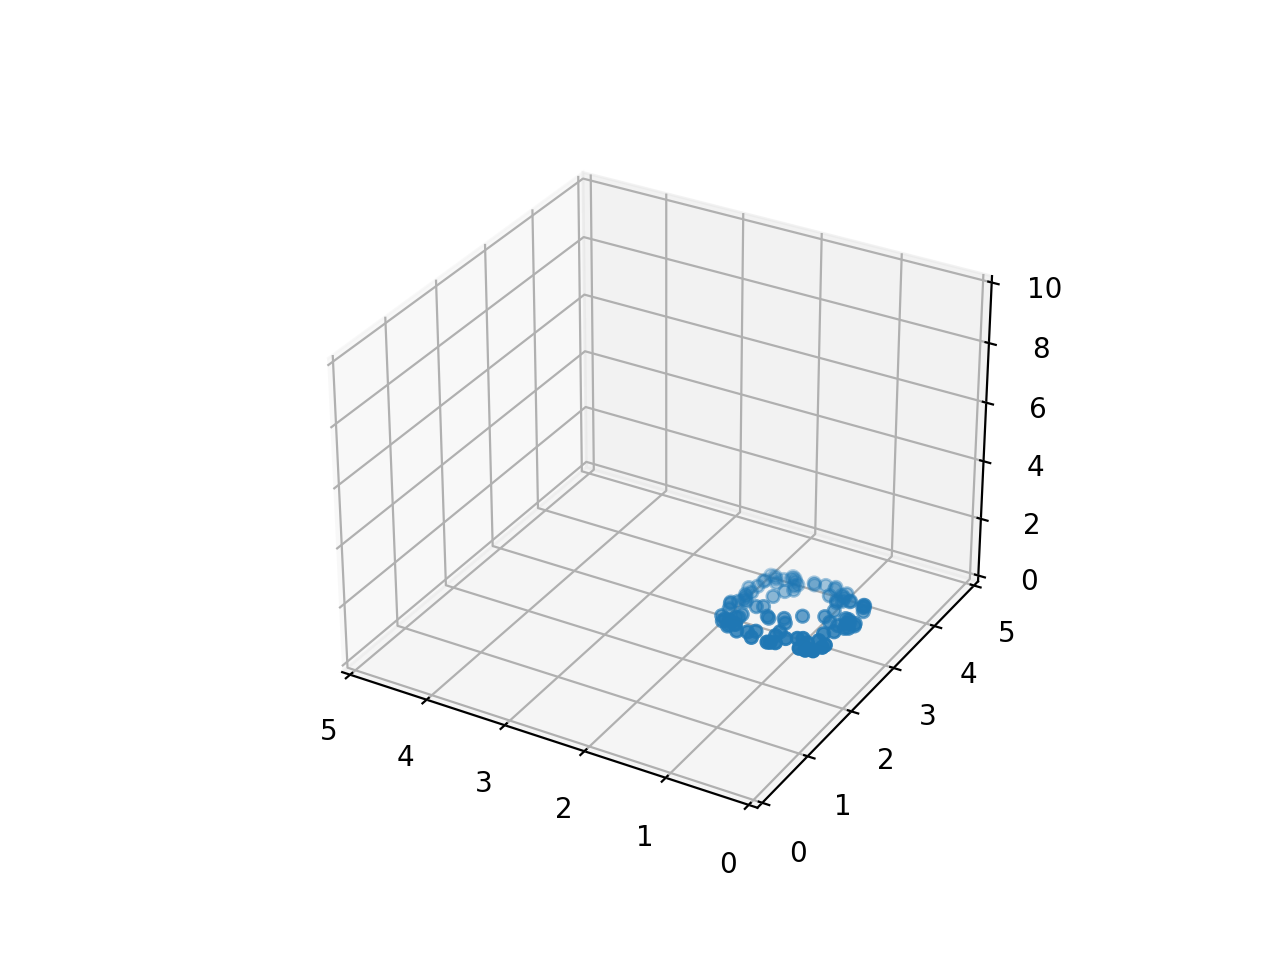

In [12]:
%matplotlib notebook
##############################################################
#The creation of my figure                                   #
fig = plt.figure()                                           #
ax = fig.add_subplot(111, projection='3d')                   #
#Creating a global variable scat to store particle positions #
scat = ax.scatter([], [], [])                                #
##############################################################

my_timer = 0 
dt = 0.01

def init():
    """
    Creates my starting particle positions on the graph
    """
    ax.clear()
    ax.set_xlim3d([0, 5])
    ax.invert_xaxis()
    ax.set_ylim3d([0, 5])
    ax.set_zlim3d([0, 10])
    scat = ax.scatter(
        [particle[0] for particle in table[my_timer]],
        [particle[1] for particle in table[my_timer]],
        [particle[2] for particle in table[my_timer]]
    )
    return scat,


def animate(frame):
    global my_timer, dt
        
    scat._offsets3d = (
        [particle[0] for particle in table[my_timer]],
        [particle[1] for particle in table[my_timer]],
        [particle[2] for particle in table[my_timer]]
    )
    my_timer += dt
    return scat,

#Interval here delays the time per frame shown
ani = FuncAnimation(fig, animate, frames=duration, init_func=init, blit=False, interval = 100)
plt.show()